In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np

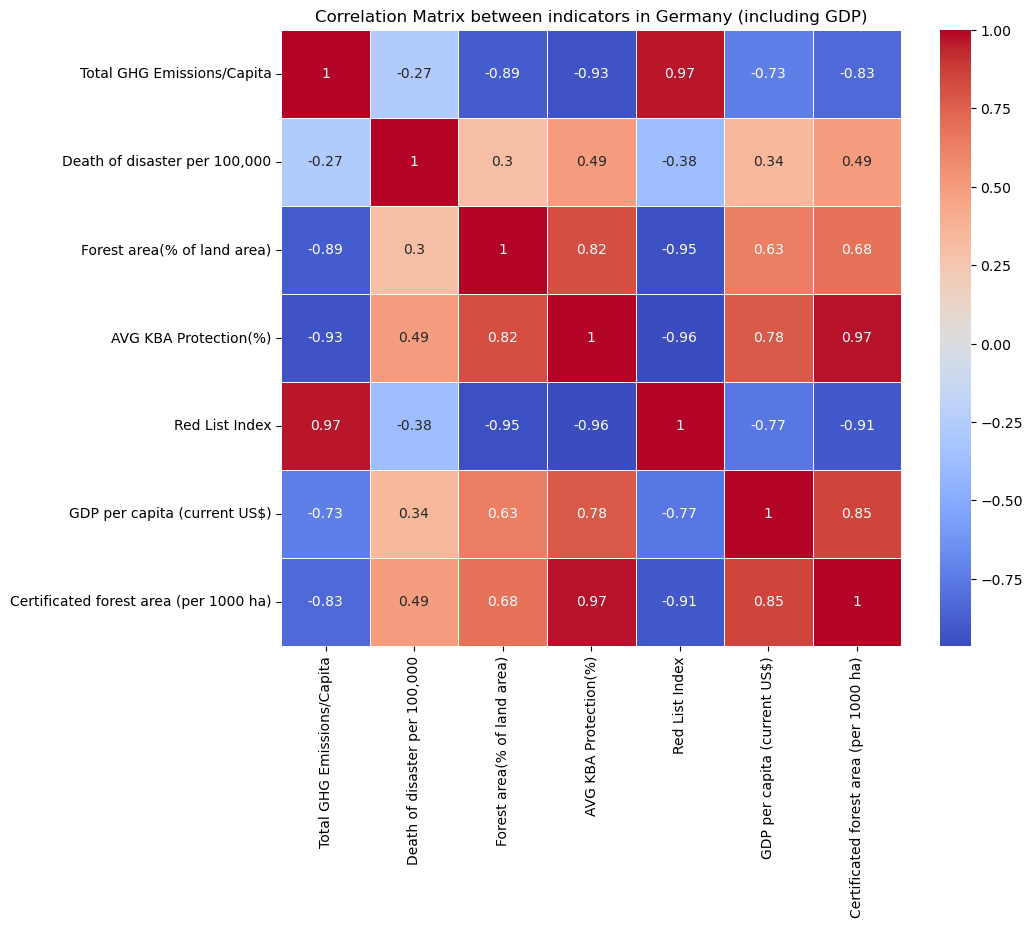

In [39]:
file_path = '../data/Germany_data+GDP.csv'
df = pd.read_csv(file_path)

# Filter data for Germany
df_germany = df[df['Country'] == 'Germany']

# Drop the 'Year' and 'Country' columns and keep relevant columns for analysis, including the new GDP column
predictor_columns = df_germany.drop(columns=['Year', 'Country'])

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(predictor_columns)
scaled_df = pd.DataFrame(scaled_data, columns=predictor_columns.columns)

# Reordering the columns to match the original order and include the new GDP column
new_column_order = [
    'Total GHG Emissions/Capita',
    'Death of disaster per 100,000',
    'Forest area(% of land area)',
    'Terrestrial and freshwater Key Biodiversity Areas (KBAs) covered by protected areas',
    'Red List Index',
    'GDP per capita (current US$)',
    'Certificated forest area (per 1000 ha)'
]

# Reorder and rename columns
scaled_df = scaled_df[new_column_order]

scaled_df.rename(columns={
    'Total GHG Emissions/Capita': 'Total GHG Emissions/Capita',
    'Terrestrial and freshwater Key Biodiversity Areas (KBAs) covered by protected areas': 'AVG KBA Protection(%)'},
    inplace=True)

# Calculate the Pearson correlation matrix
correlation_matrix = scaled_df.corr()

# Create the heatmap including the GDP column
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix between indicators in Germany (including GDP)')
plt.show()


Missing values after imputation:
 Country                                                 0
Year                                                    0
Total GHG Emissions/Capita                              0
Deaths of disasters per 100,000                         0
Forest area(% of land area)                             0
Mean area protected in freshwater and terrestrial(%)    0
Red List Index                                          0
GDP per capita (current US$)                            0
Certificated forest area (per 1000 ha)                  0
dtype: int64


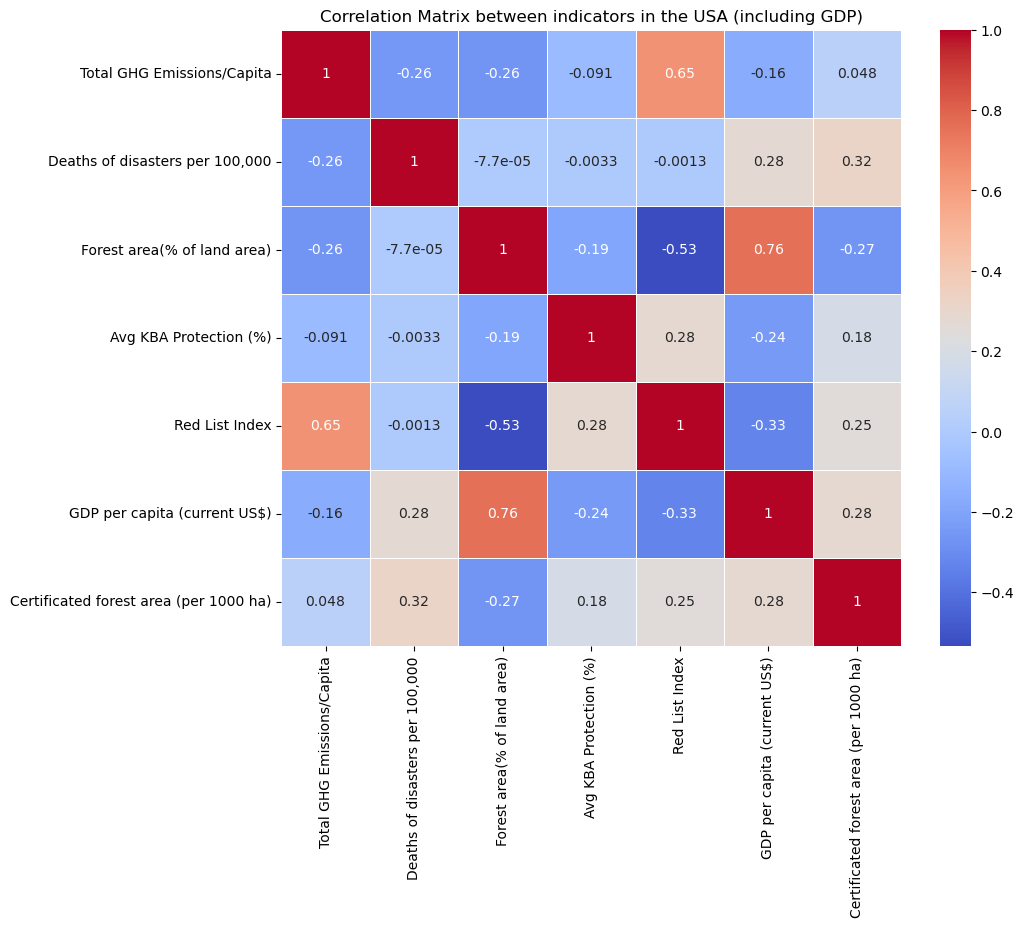

In [38]:
file_path_usa_updated = '../data/USA_data+GDP.csv'
df_usa_updated = pd.read_csv(file_path_usa_updated)

# Select only the numeric columns for mean imputation
numeric_columns = df_usa_updated.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values with the mean of the numeric columns
df_usa_updated[numeric_columns] = df_usa_updated[numeric_columns].fillna(df_usa_updated[numeric_columns].mean())

# Check if the missing values are handled
print("Missing values after imputation:\n", df_usa_updated.isna().sum())

# Drop the 'Year' and 'Country' columns and keep relevant columns for analysis
predictor_columns = df_usa_updated.drop(columns=['Year', 'Country'])

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(predictor_columns)
scaled_df = pd.DataFrame(scaled_data, columns=predictor_columns.columns)

# Reordering the columns to match the original order and include the new GDP column
new_column_order = [
    'Total GHG Emissions/Capita',
    'Deaths of disasters per 100,000',
    'Forest area(% of land area)',
    'Mean area protected in freshwater and terrestrial(%)',
    'Red List Index',
    'GDP per capita (current US$)',
    'Certificated forest area (per 1000 ha)'
]

# Reorder and rename columns
scaled_df = scaled_df[new_column_order]

scaled_df.rename(columns={
    'Total GHG Emissions/Capita': 'Total GHG Emissions/Capita',
    'Mean area protected in freshwater and terrestrial(%)': 'Avg KBA Protection (%)'}, 
    inplace=True)

# Calculate the Pearson correlation matrix
correlation_matrix_usa_updated = scaled_df.corr()

# Create the heatmap including the GDP column
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix_usa_updated, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix between indicators in the USA (including GDP)')
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since function

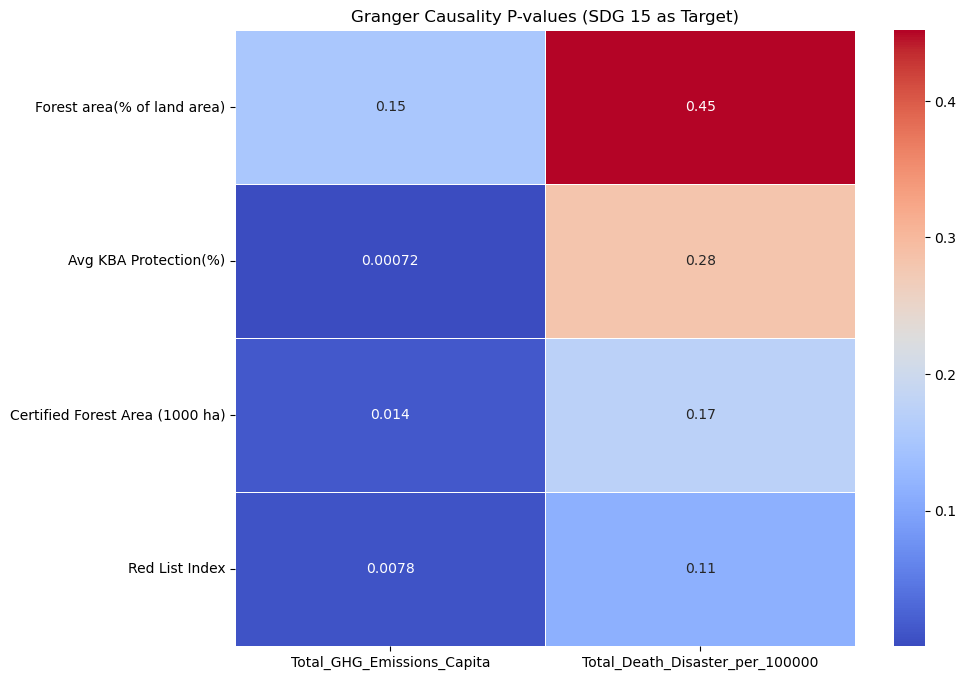

In [33]:
# Load the dataset
file_path = '../data/Germany_data+GDP.csv'
df = pd.read_csv(file_path)

# Filter data for Germany
df_germany = df[df['Country'] == 'Germany']

# Drop the 'Year' and 'Country' columns and keep relevant columns for analysis
predictor_columns = df_germany.drop(columns=['Year', 'Country'])

# Reordering the columns to focus on SDG 15 targets and excluding GDP
new_column_order = [
    'Forest area(% of land area)',
    'Terrestrial and freshwater Key Biodiversity Areas (KBAs) covered by protected areas',
    'Red List Index',
    'Certificated forest area (per 1000 ha)',
    'Total GHG Emissions/Capita',
    'Death of disaster per 100,000'
]

# Reorder and rename columns
df_germany = df_germany[new_column_order]

# Renaming columns for clarity
df_germany.rename(columns={
    'Terrestrial and freshwater Key Biodiversity Areas (KBAs) covered by protected areas': 'Avg KBA Protection(%)',
    'Certificated forest area (per 1000 ha)': 'Certified Forest Area (1000 ha)',
    'Total GHG Emissions/Capita': 'Total_GHG_Emissions_Capita',
    'Death of disaster per 100,000': 'Total_Death_Disaster_per_100000'
}, inplace=True)

# Running Granger Causality Test
max_lag = 2
results = {}
target_variables = ['Forest area(% of land area)', 'Avg KBA Protection(%)', 'Certified Forest Area (1000 ha)', 'Red List Index']

for target in target_variables:
    p_values = []
    for column in ['Total_GHG_Emissions_Capita', 'Total_Death_Disaster_per_100000']:
        test_result = grangercausalitytests(df_germany[[target, column]].dropna(), max_lag, verbose=False)
        p_values.append([test_result[i+1][0]['ssr_ftest'][1] for i in range(max_lag)])
    results[target] = np.min(p_values, axis=1)  # Take minimum p-value across lags for each variable

# Convert results to a DataFrame
granger_df = pd.DataFrame(results, index=['Total_GHG_Emissions_Capita', 'Total_Death_Disaster_per_100000'])

# Create heatmap to visualize Granger causality test p-values
plt.figure(figsize=(10, 8))
sns.heatmap(granger_df.T, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Granger Causality P-values (SDG 13 as Target)')
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since function

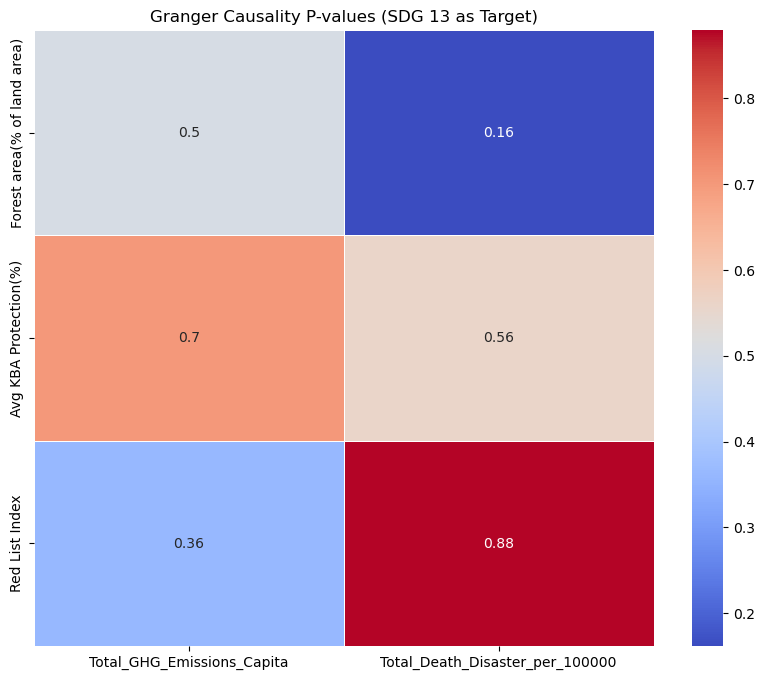

In [37]:
# Load the updated USA dataset with filled data
new_usa_file_path_filled = '../data/USA_data+GDP.csv'
df_usa_new_filled = pd.read_csv(new_usa_file_path_filled)

# Reordering and renaming columns for the analysis, including 'Deaths of disasters per 100,000'
usa_column_order_filled = [
    'Forest area(% of land area)',
    'Mean area protected in freshwater and terrestrial(%)',
    'Red List Index',
    'Total GHG Emissions/Capita',
    'Deaths of disasters per 100,000'
]

# Reorder and rename columns
df_usa_new_filled = df_usa_new_filled[usa_column_order_filled]

# Renaming columns for clarity
df_usa_new_filled.rename(columns={
    'Mean area protected in freshwater and terrestrial(%)': 'Avg KBA Protection(%)',
    'Total GHG Emissions/Capita': 'Total_GHG_Emissions_Capita',
    'Deaths of disasters per 100,000': 'Total_Death_Disaster_per_100000'
}, inplace=True)

# Running Granger Causality Test for the new USA data including 'Deaths of disasters per 100,000'
max_lag = 1
usa_results_new_filled = {}
target_variables_new_usa_filled = ['Forest area(% of land area)', 'Avg KBA Protection(%)', 'Red List Index']

for target in target_variables_new_usa_filled:
    p_values = []
    for column in ['Total_GHG_Emissions_Capita', 'Total_Death_Disaster_per_100000']:
        test_result = grangercausalitytests(df_usa_new_filled[[target, column]].dropna(), max_lag, verbose=False)
        p_values.append([test_result[i+1][0]['ssr_ftest'][1] for i in range(max_lag)])
    usa_results_new_filled[target] = np.min(p_values, axis=1)  # Take minimum p-value across lags for each variable

# Convert results to a DataFrame
granger_df_usa_new_filled = pd.DataFrame(usa_results_new_filled, index=['Total_GHG_Emissions_Capita', 'Total_Death_Disaster_per_100000'])

# Create heatmap to visualize Granger causality test p-values for new USA data including 'Deaths of disasters per 100,000'
plt.figure(figsize=(10, 8))
sns.heatmap(granger_df_usa_new_filled.T, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Granger Causality P-values (SDG 13 as Target)')
plt.show()